In [1]:
!pip install tensorflow --quiet




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Normalize pixel values from [0,255] → [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images: 28x28 → 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

print(" Data normalized and flattened")
print("New training shape:", x_train.shape)
print("New test shape:", x_test.shape)


✅ Data normalized and flattened
New training shape: (60000, 784)
New test shape: (10000, 784)


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),  # Hidden Layer 1
    layers.Dense(128, activation='relu'),                      # Hidden Layer 2
    layers.Dense(64, activation='relu'),                       # Hidden Layer 3
    layers.Dense(32, activation='relu'),                       # Hidden Layer 4
    layers.Dense(10, activation='softmax')                     # Output Layer
])
model.summary()


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model compiled successfully")


✅ Model compiled successfully


In [6]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8724 - loss: 0.4154 - val_accuracy: 0.9640 - val_loss: 0.1153
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9693 - loss: 0.1012 - val_accuracy: 0.9625 - val_loss: 0.1150
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9789 - loss: 0.0672 - val_accuracy: 0.9724 - val_loss: 0.0947
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9844 - loss: 0.0503 - val_accuracy: 0.9775 - val_loss: 0.0758
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9872 - loss: 0.0410 - val_accuracy: 0.9798 - val_loss: 0.0729


In [12]:
history

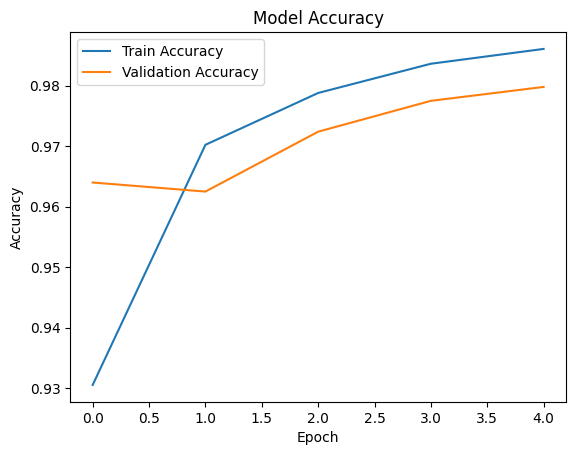

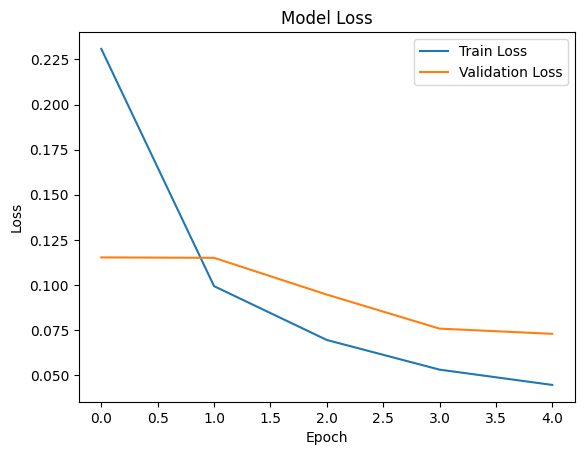

In [7]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9755 - loss: 0.0872
✅ Test Accuracy: 0.9798


In [16]:
model.save('mnist_ANN_model.h5')
print("✅ ANN model MINIST")


✅ ANN model MINIST
